# Glass classification

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)

In [2]:
col_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass']

### Collecting Data

In [3]:
df = pd.read_csv('trainKNN.txt', names = col_names)
df.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


### Analysing Data

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,196.0,102.862245,61.195663,1.00000,49.750000,101.50000,153.250000,211.00000
RI,196.0,1.518295,0.003055,1.51131,1.516458,1.51763,1.518985,1.53393
Na,196.0,13.375204,0.783145,10.73000,12.877500,13.28000,13.792500,15.79000
Mg,196.0,2.758980,1.392641,0.00000,2.362500,3.48000,3.610000,4.49000
Al,196.0,1.454337,0.491688,0.29000,1.190000,1.36000,1.622500,3.50000
Si,196.0,72.635408,0.763578,69.81000,72.317500,72.81000,73.080000,75.18000
K,196.0,0.519388,0.672703,0.00000,0.140000,0.56000,0.610000,6.21000
Ca,196.0,8.910714,1.421490,5.43000,8.220000,8.57500,9.092500,16.19000
Ba,196.0,0.164235,0.485198,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,196.0,0.050255,0.086359,0.00000,0.000000,0.00000,0.090000,0.34000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      196 non-null    int64  
 1   RI      196 non-null    float64
 2   Na      196 non-null    float64
 3   Mg      196 non-null    float64
 4   Al      196 non-null    float64
 5   Si      196 non-null    float64
 6   K       196 non-null    float64
 7   Ca      196 non-null    float64
 8   Ba      196 non-null    float64
 9   Fe      196 non-null    float64
 10  glass   196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 16.9 KB


In [6]:
df.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


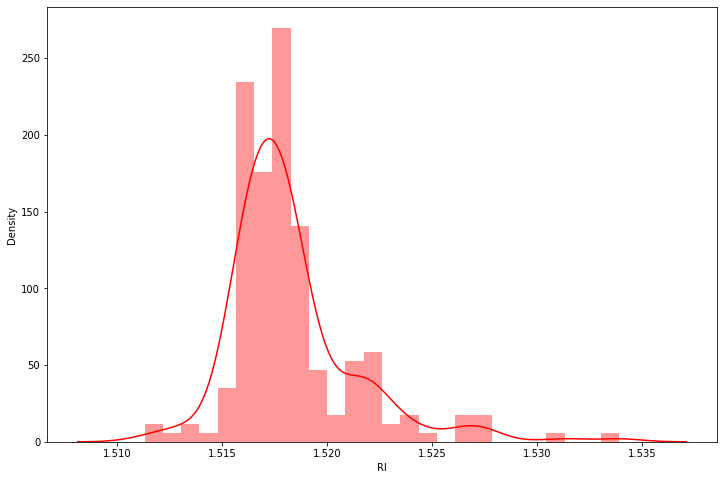

In [7]:
plt.figure(figsize = (12, 8))
sns.distplot(df['RI'], color='red')
plt.show()

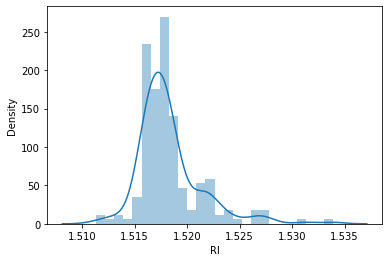

In [8]:
sns.distplot(df['RI'])
plt.show()

In [9]:
df.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


<AxesSubplot:xlabel='Na'>

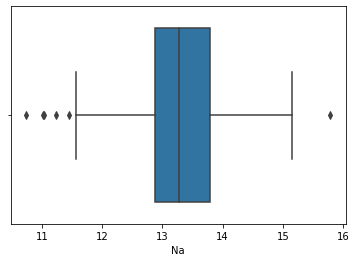

In [10]:
sns.boxplot(df['Na'])

In [11]:
df['Mg'].describe()

count    196.000000
mean       2.758980
std        1.392641
min        0.000000
25%        2.362500
50%        3.480000
75%        3.610000
max        4.490000
Name: Mg, dtype: float64

In [12]:
df.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


<AxesSubplot:ylabel='Frequency'>

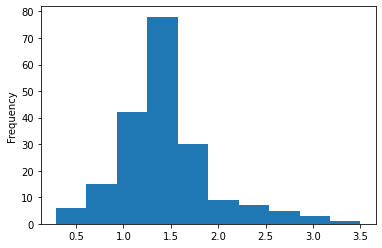

In [13]:
df['Al'].plot(kind = 'hist')

In [14]:
df.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


<AxesSubplot:ylabel='Frequency'>

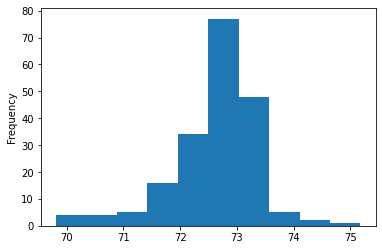

In [15]:
df['Si'].plot(kind = 'hist')

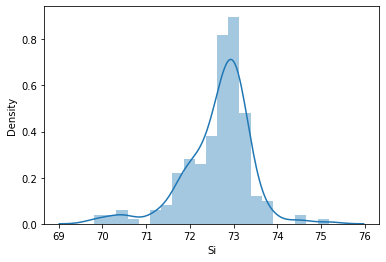

In [16]:
sns.distplot(df['Si'])
plt.show()

In [17]:
df.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [18]:
df['K'].describe()

count    196.000000
mean       0.519388
std        0.672703
min        0.000000
25%        0.140000
50%        0.560000
75%        0.610000
max        6.210000
Name: K, dtype: float64

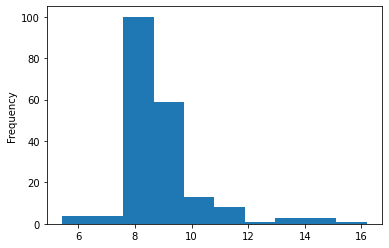

In [19]:
df['Ca'].plot(kind = 'hist')
plt.show()

In [20]:
df.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [21]:
df['Ba'].describe()

count    196.000000
mean       0.164235
std        0.485198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.150000
Name: Ba, dtype: float64

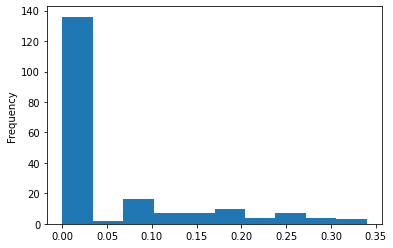

In [22]:
df['Fe'].plot(kind = 'hist')
plt.show()

In [23]:
df.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [24]:
from pandas.plotting import scatter_matrix

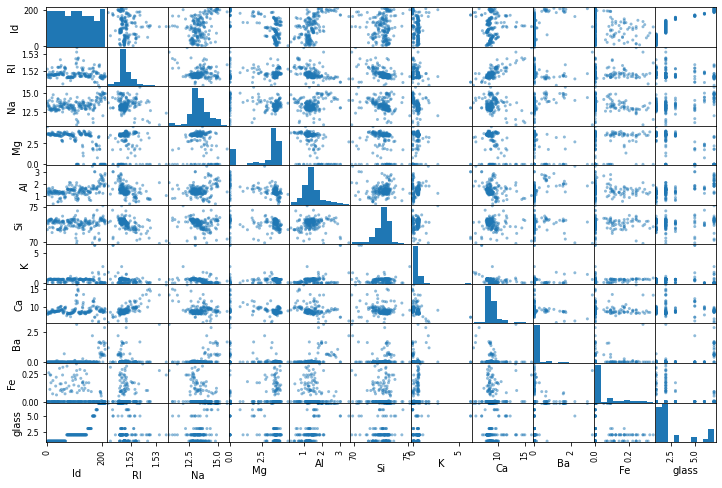

In [25]:
scatter_matrix(df, figsize = (12, 8))
plt.show()

<Figure size 864x576 with 0 Axes>

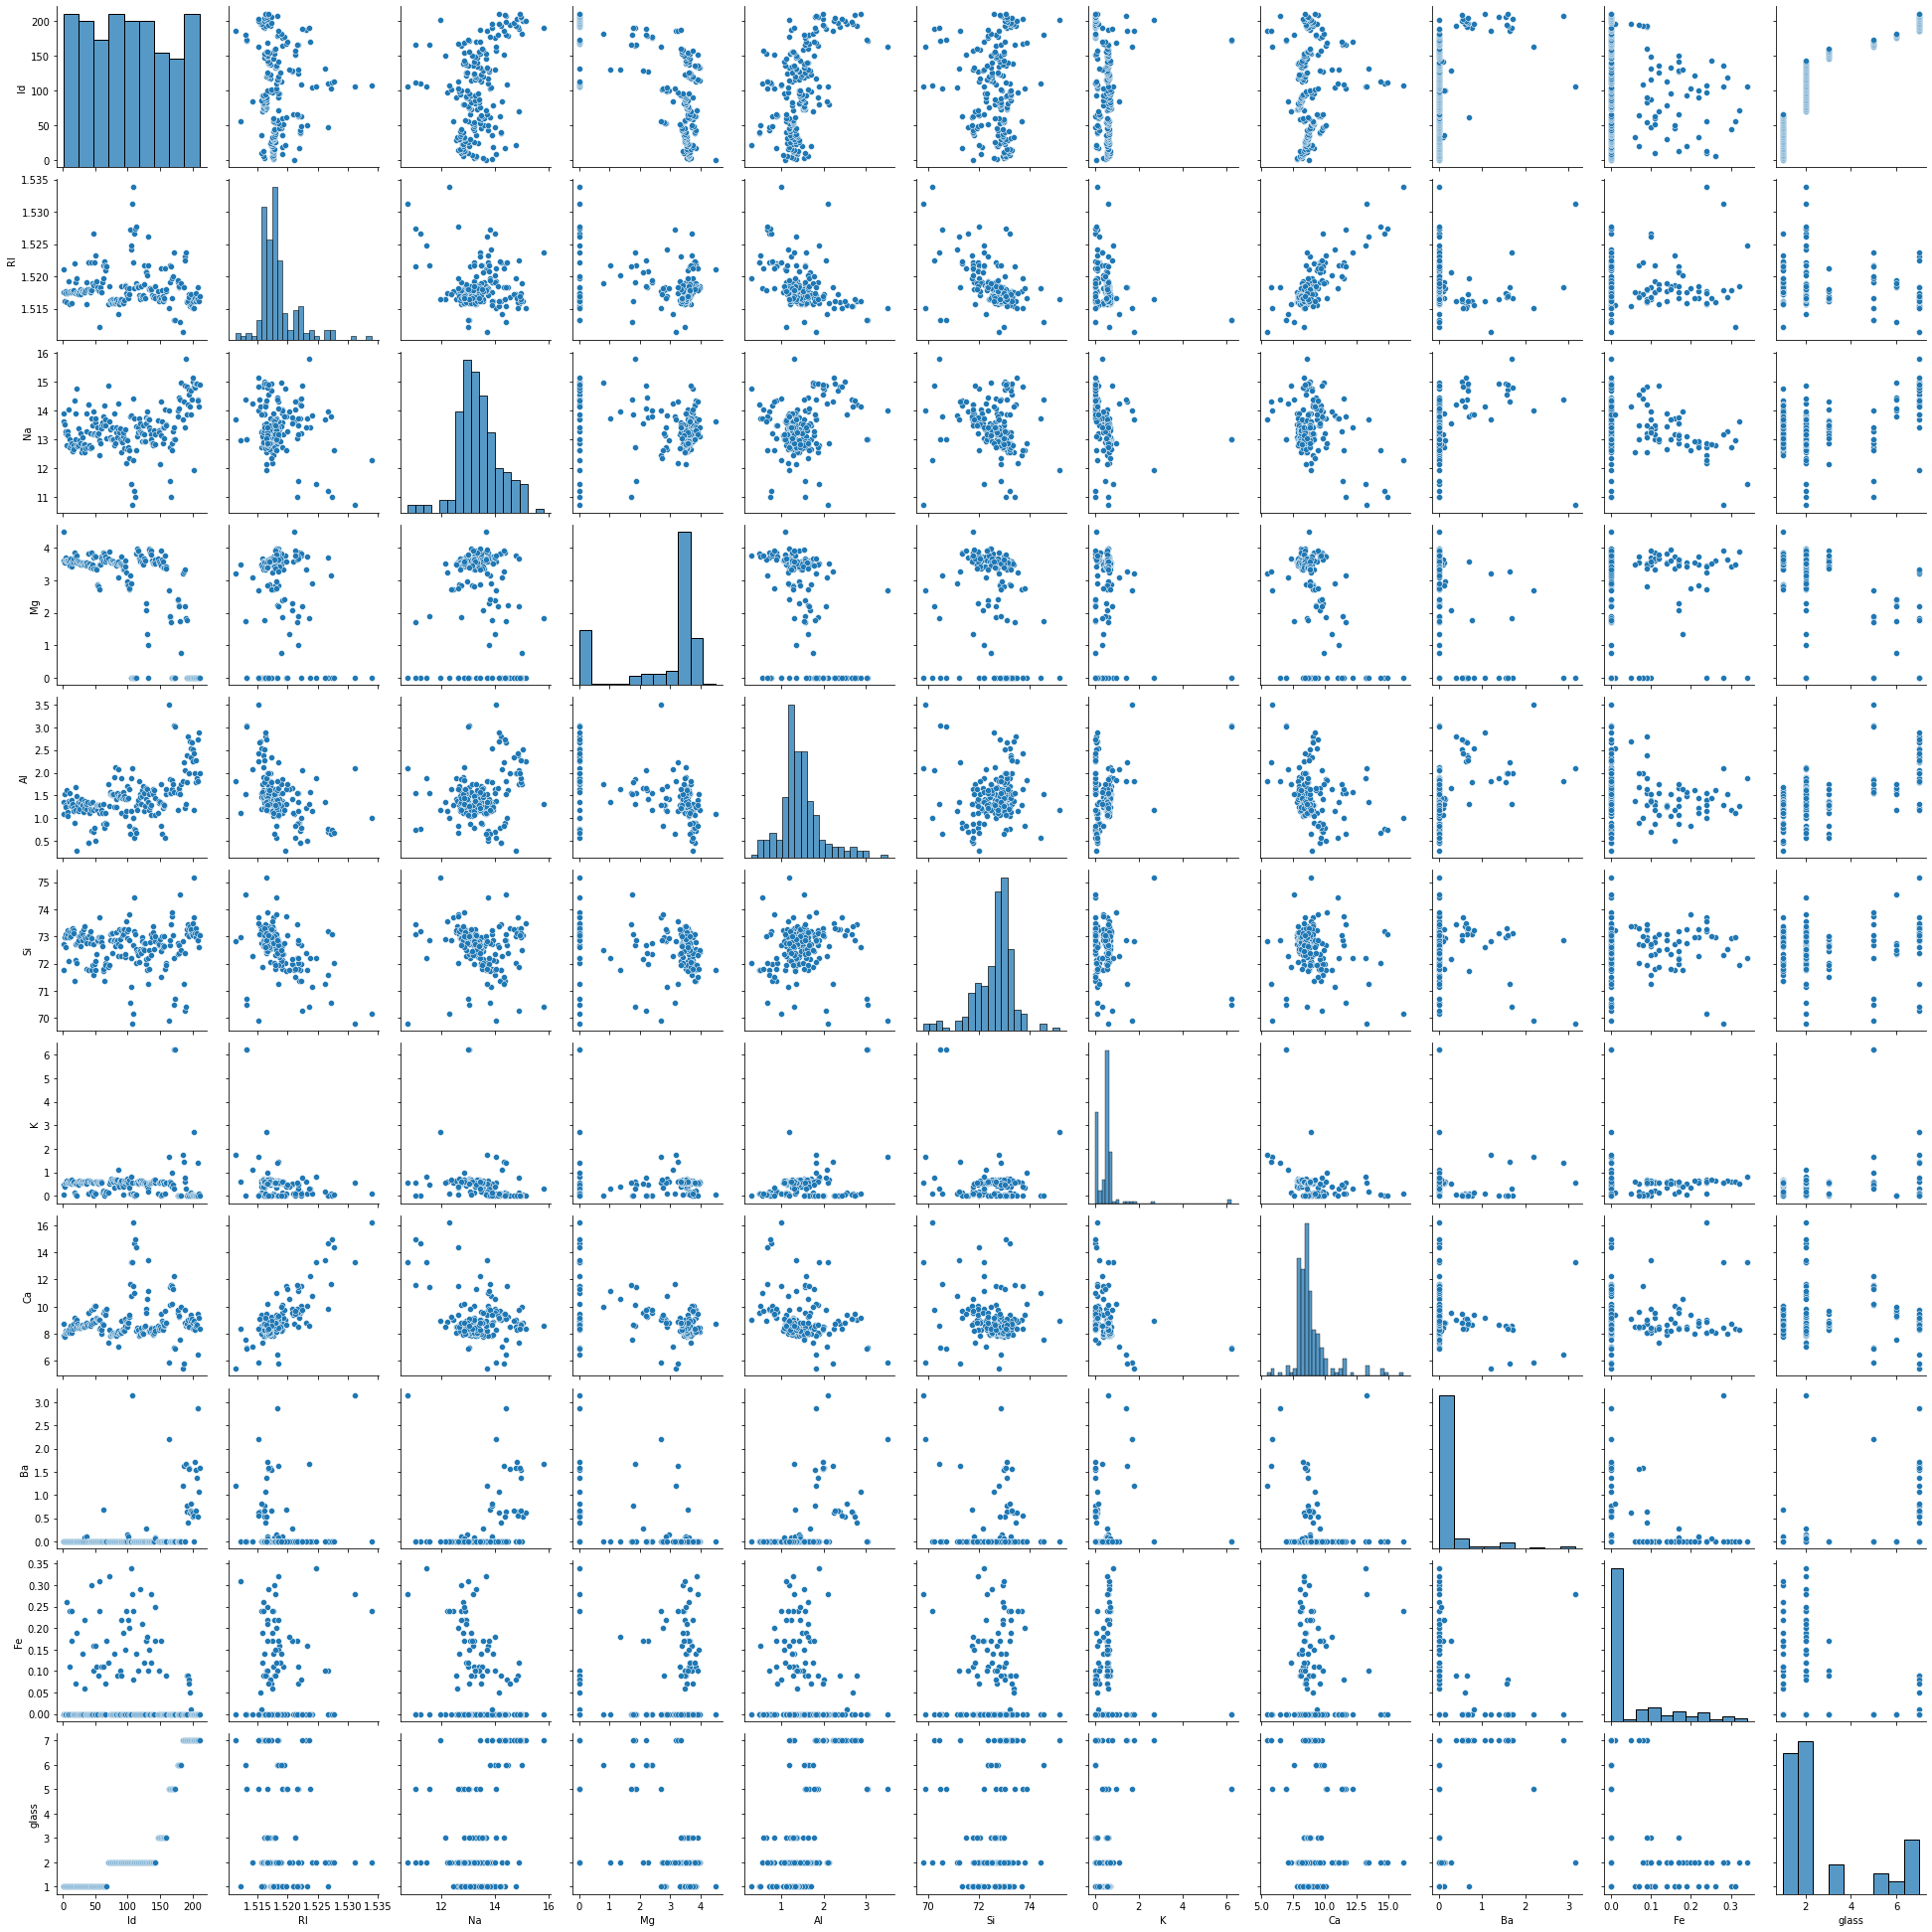

In [26]:
plt.figure(figsize = (12, 8))
sns.pairplot(df)
plt.show()

In [27]:
df.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [28]:
df.isnull().sum()

Id       0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
glass    0
dtype: int64

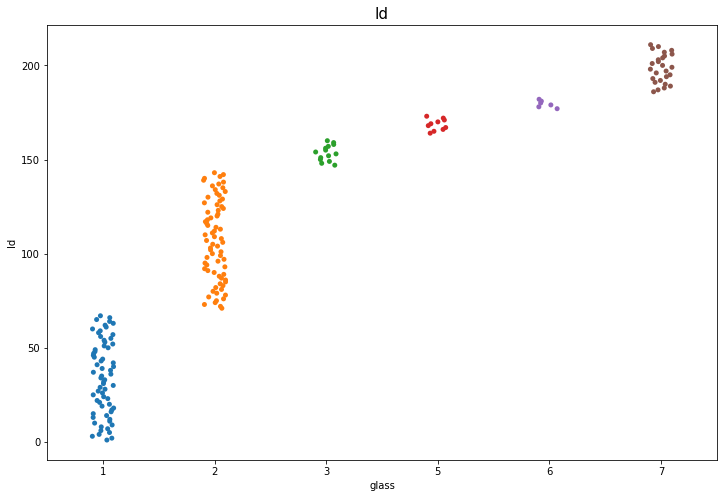

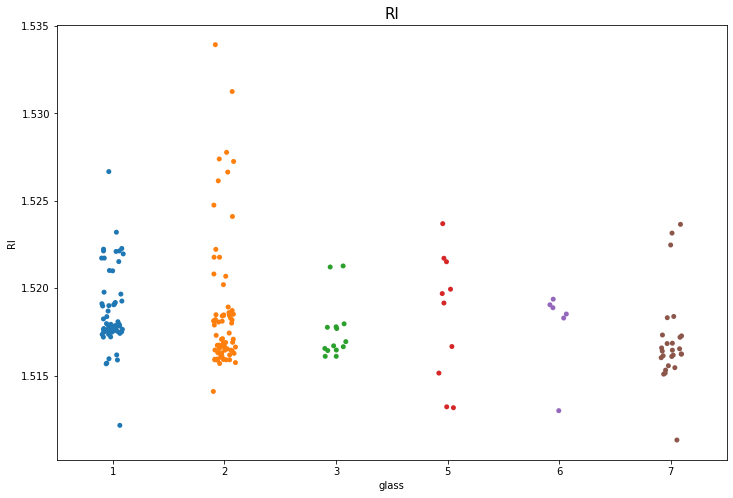

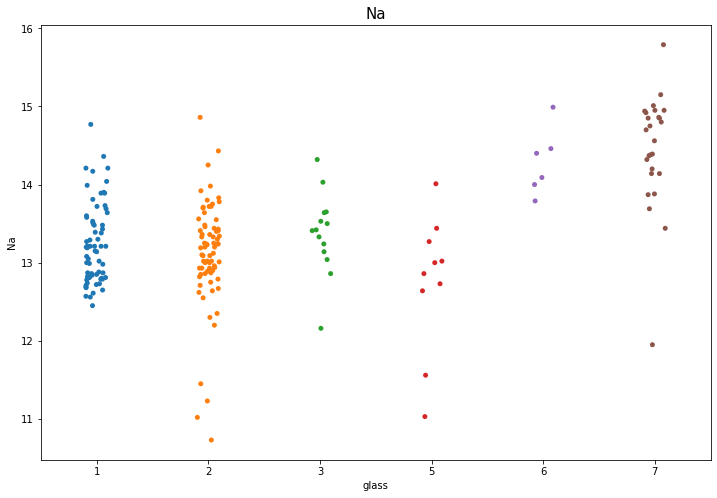

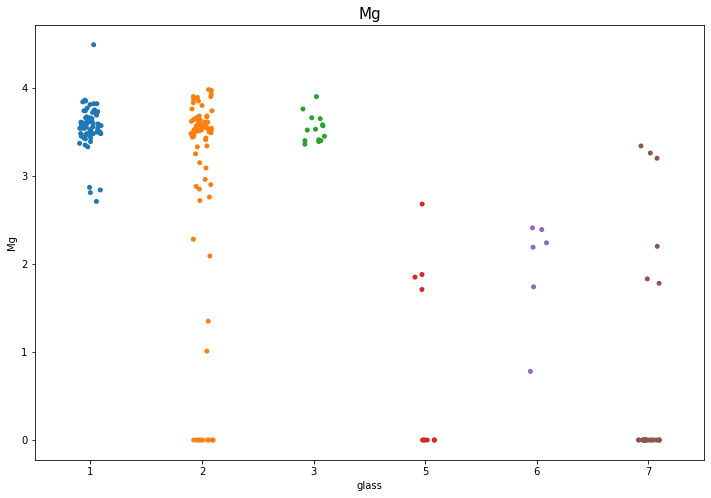

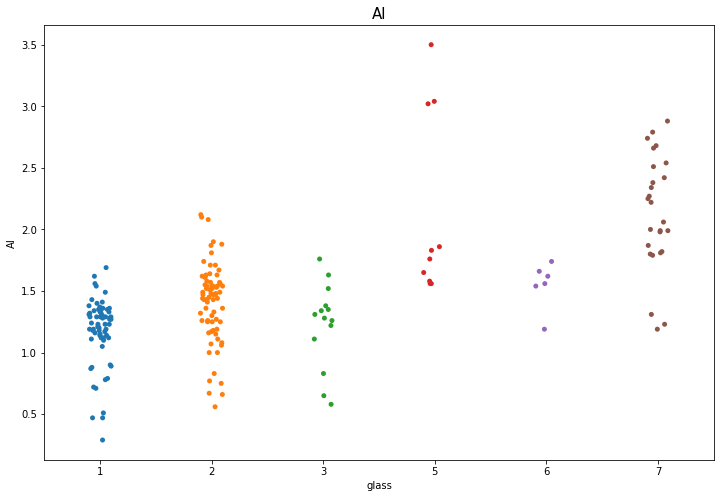

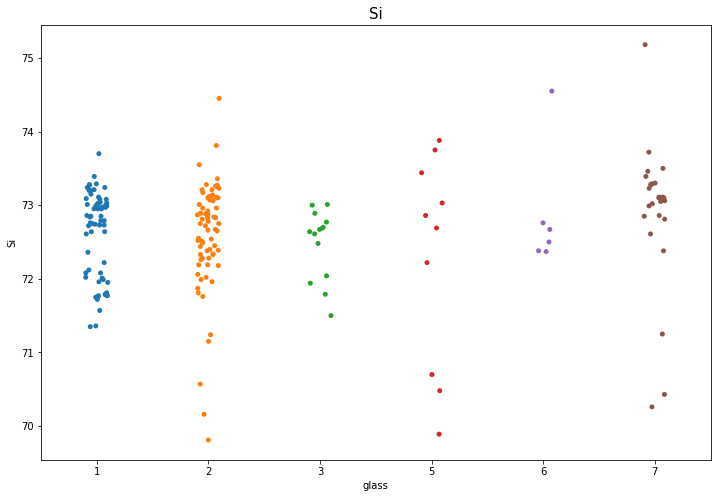

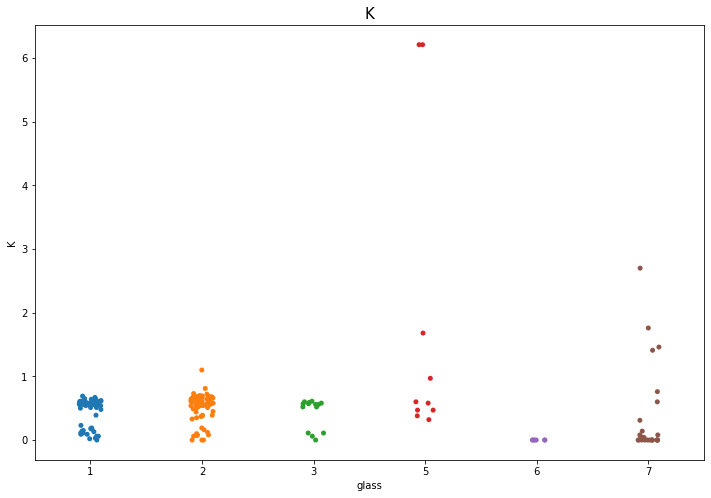

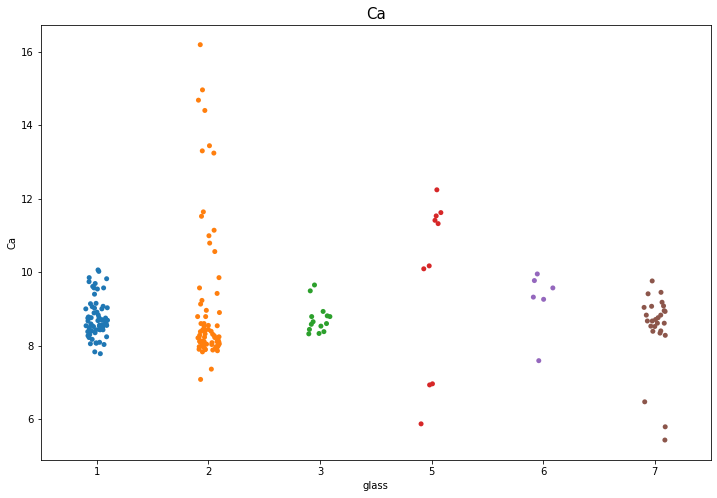

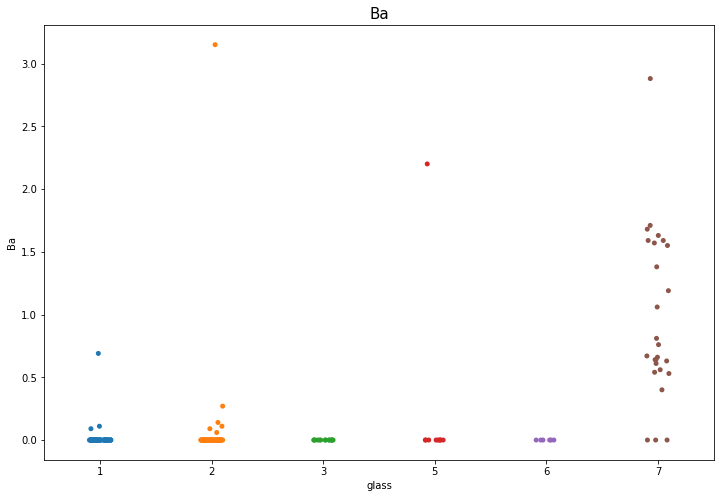

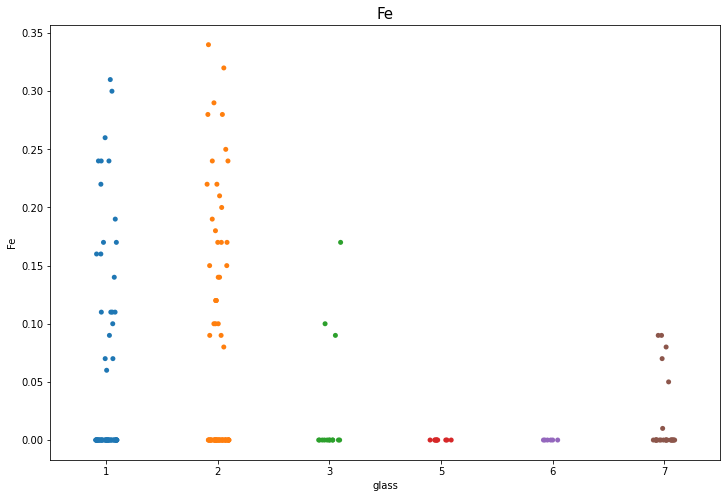

In [29]:
for i in df.columns[:-1]:
    plt.figure(figsize = (12, 8))
    sns.stripplot(df['glass'], df[i])
    plt.title(i, size = 15)
    plt.show()

In [30]:
cols = list(df.columns[1:-1])

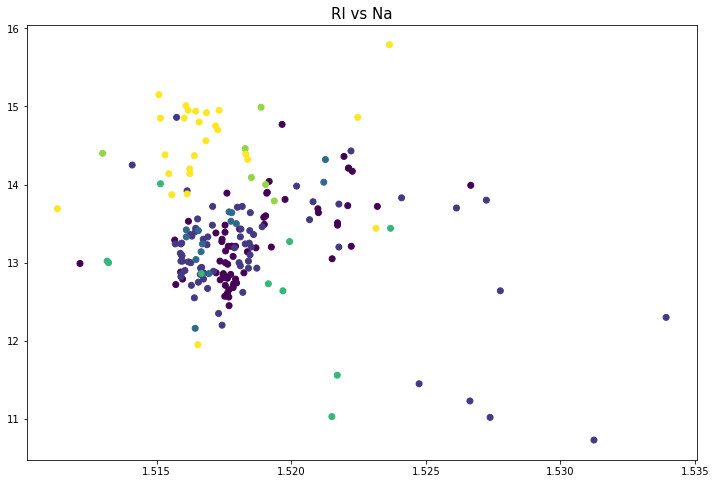

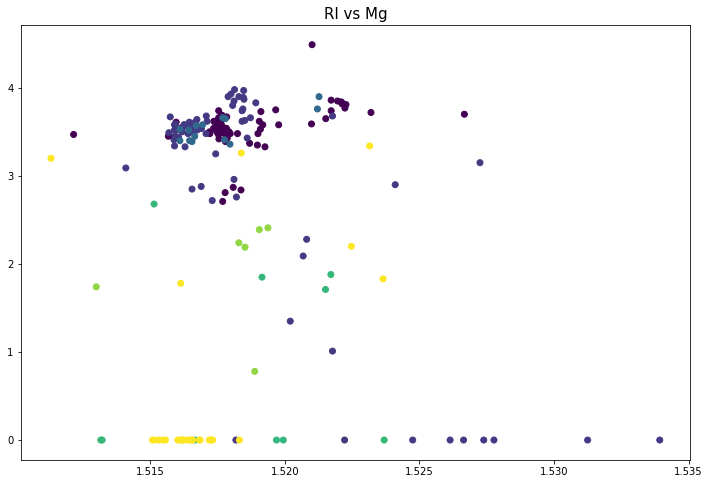

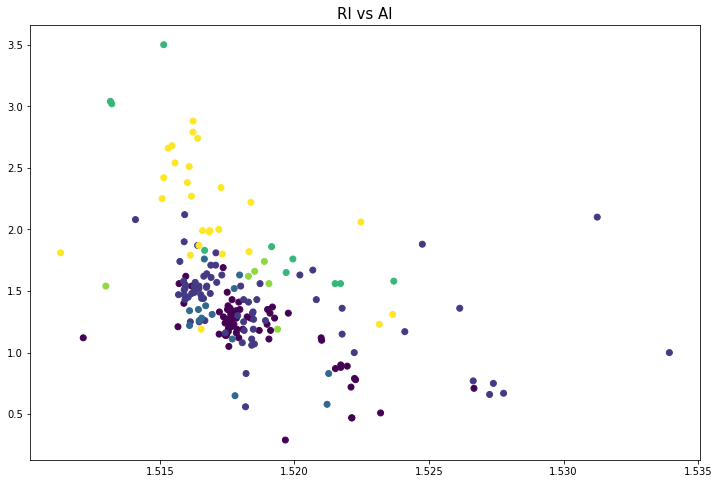

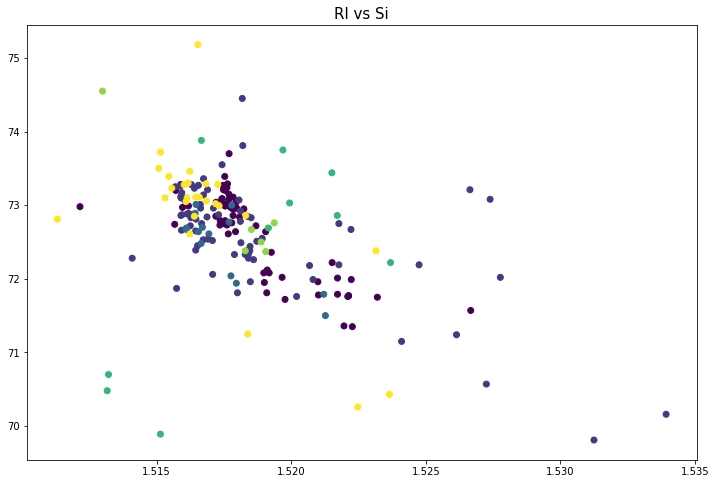

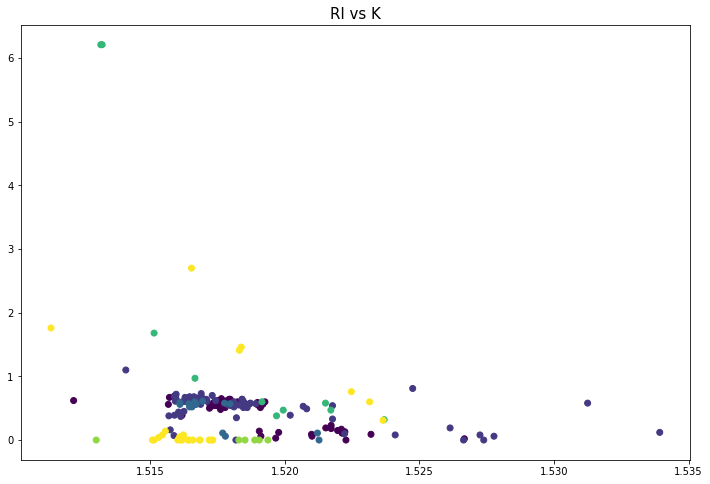

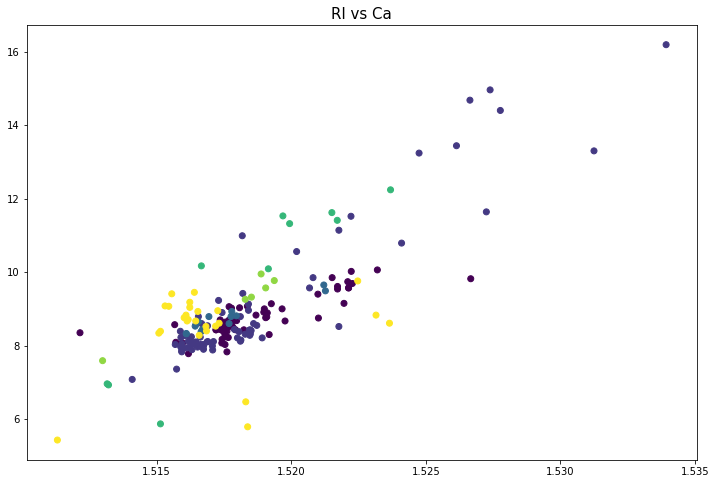

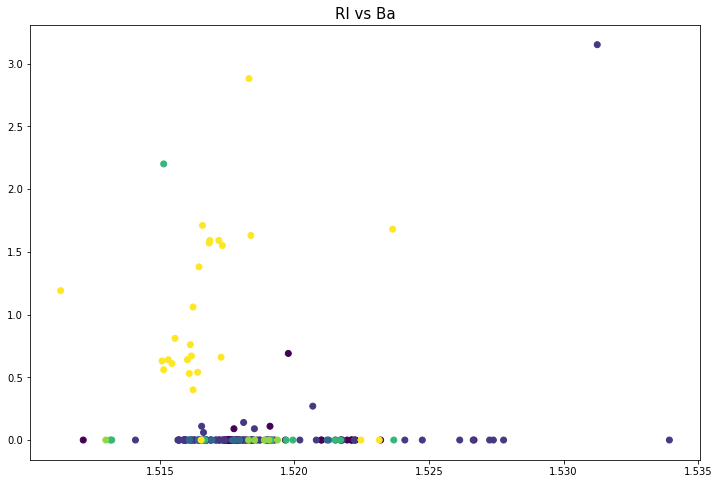

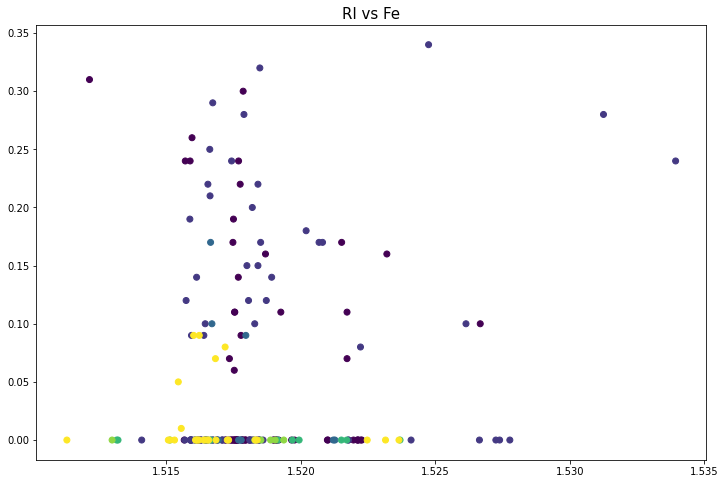

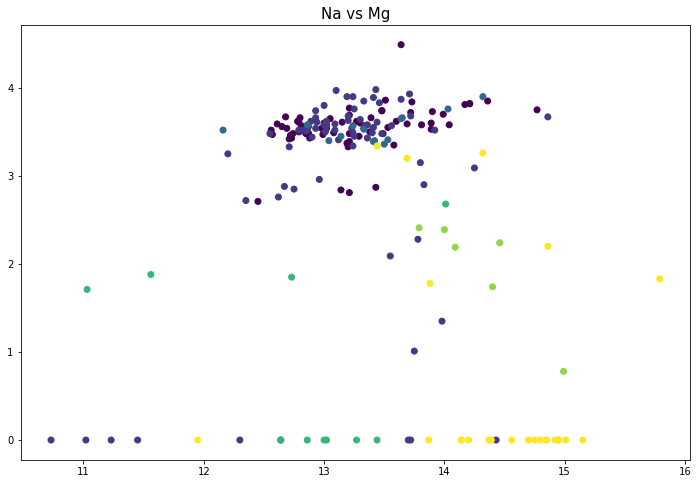

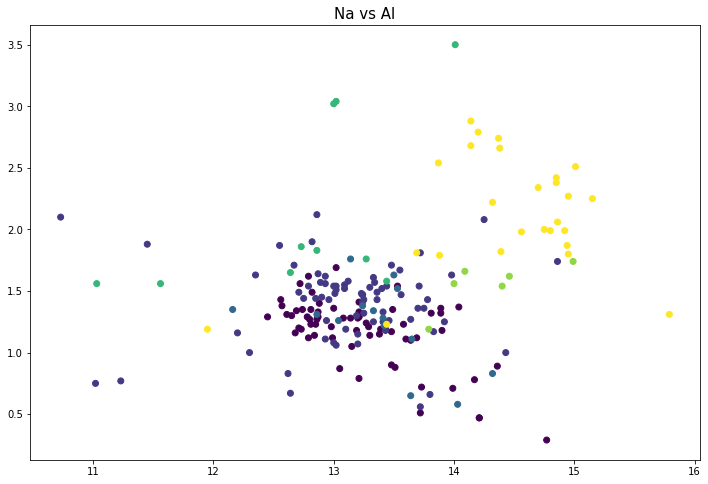

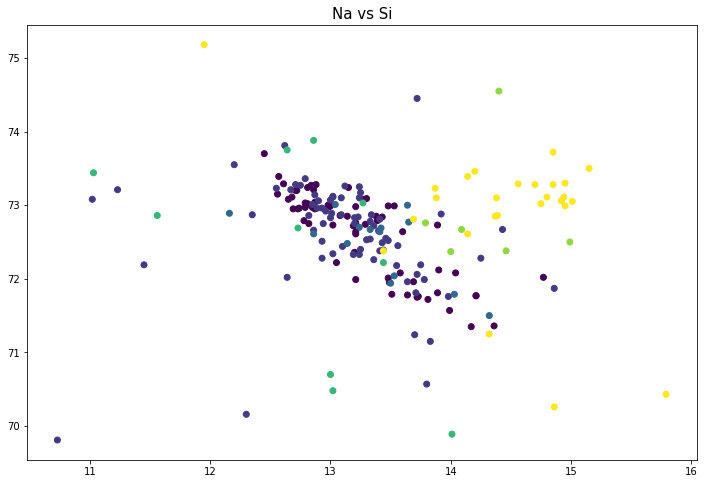

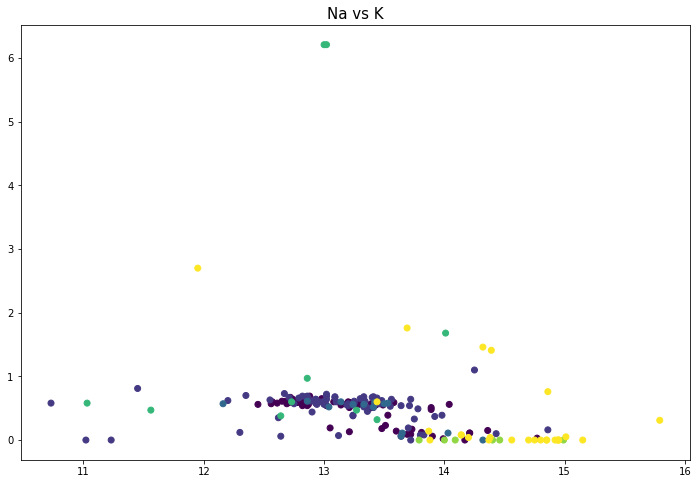

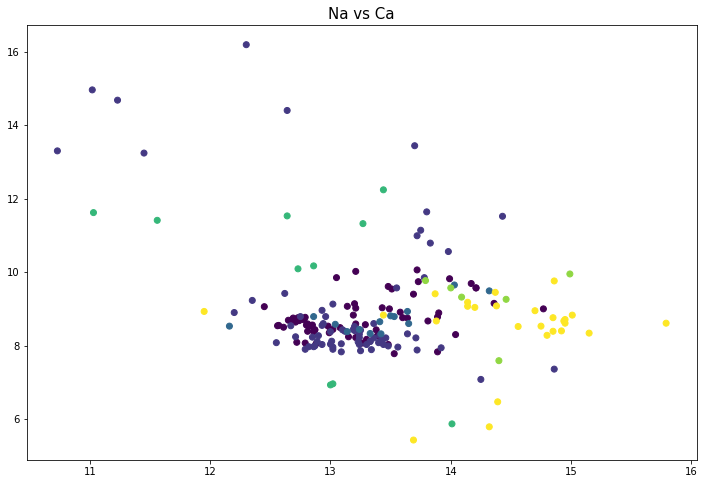

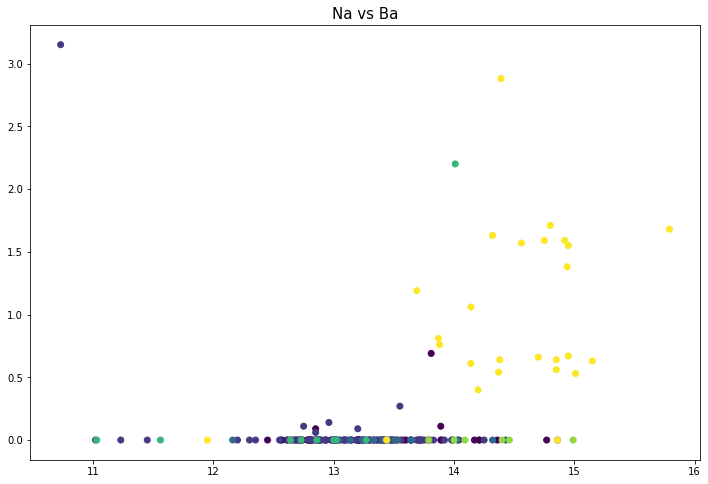

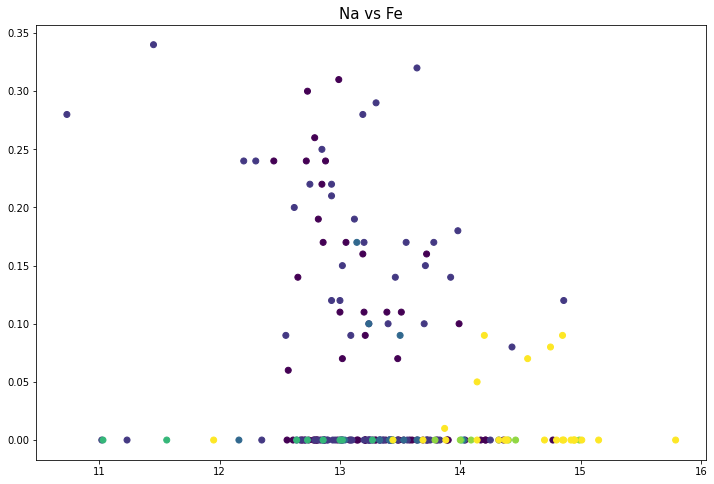

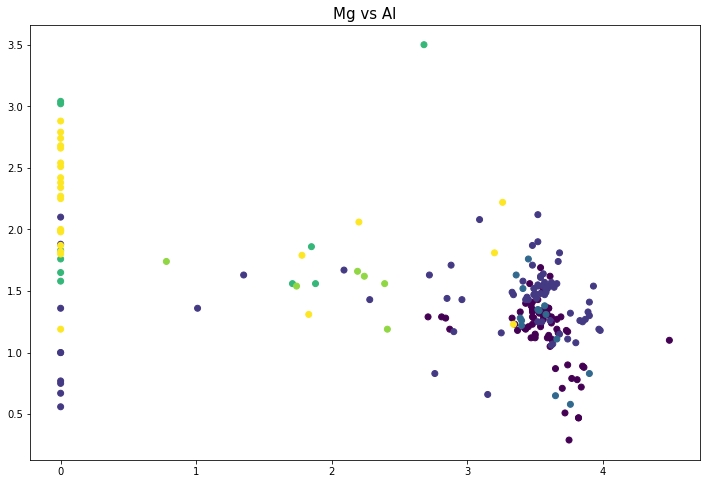

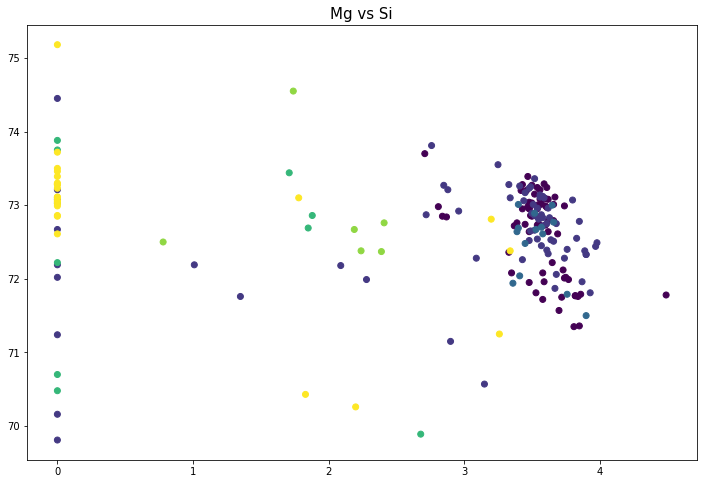

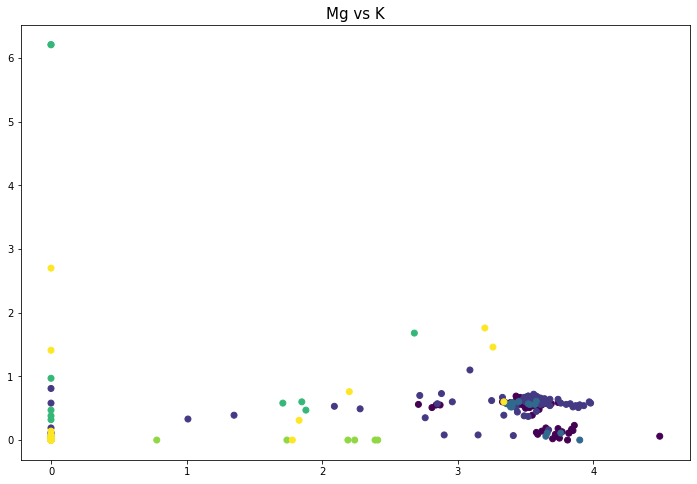

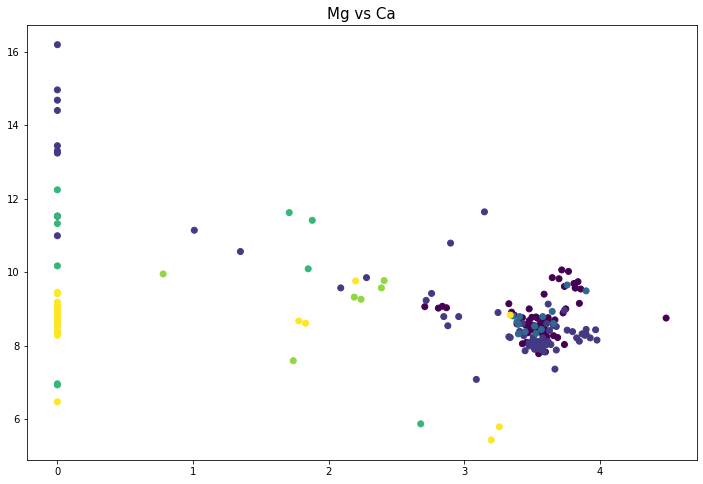

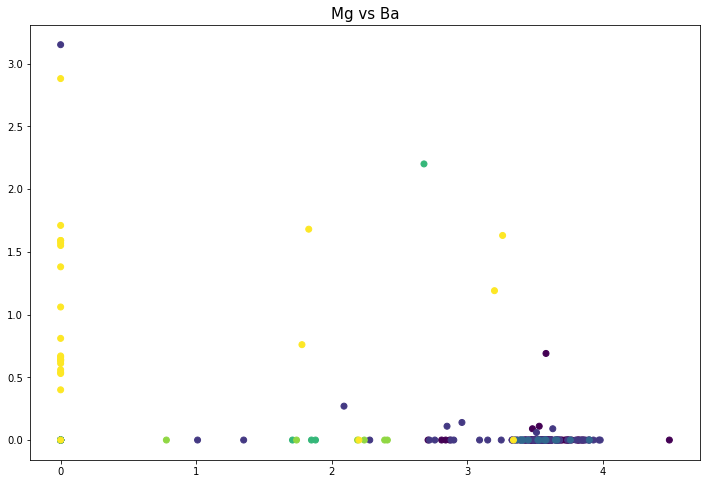

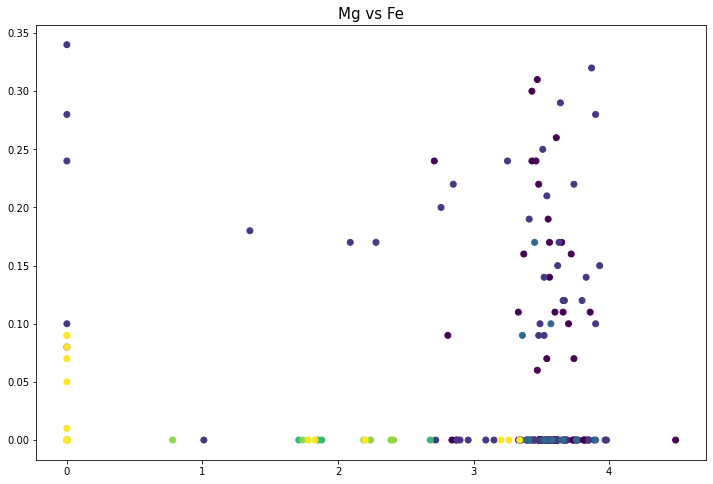

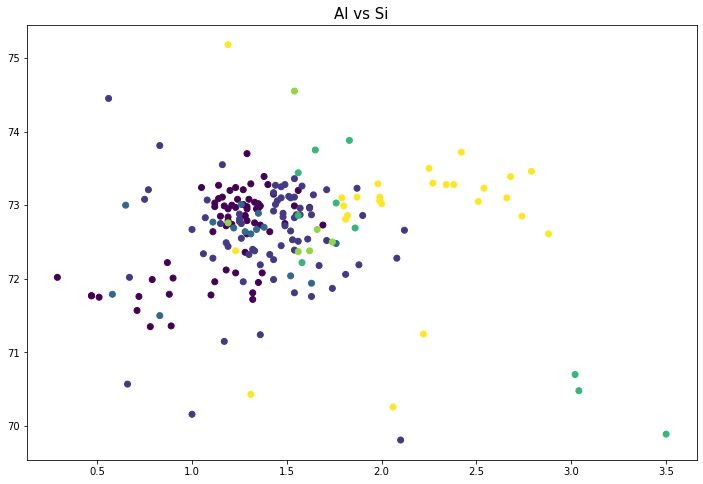

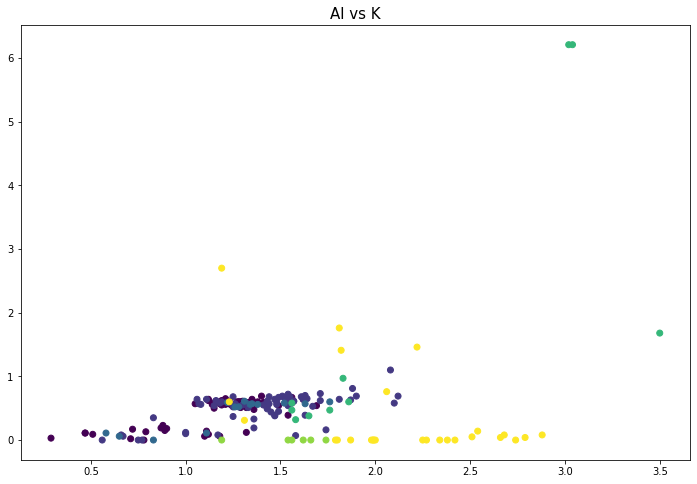

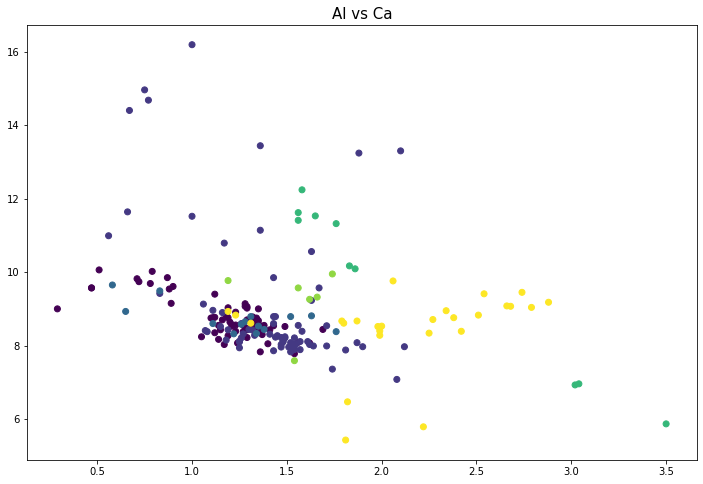

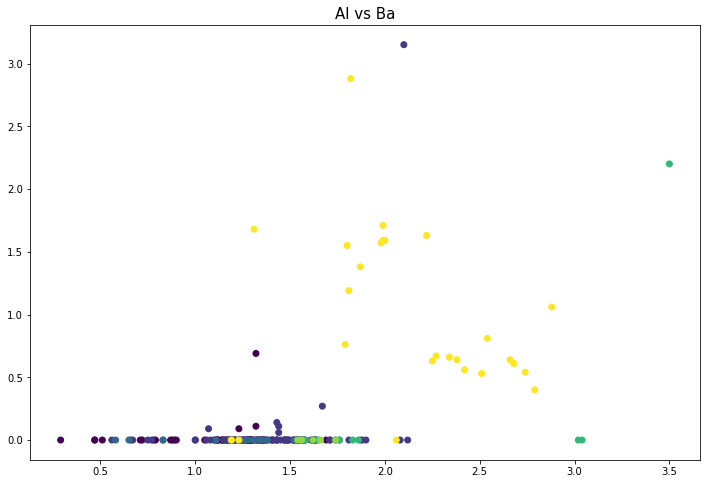

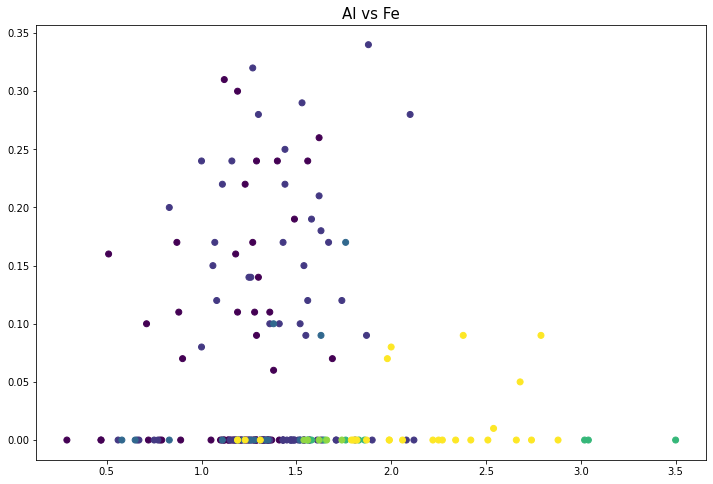

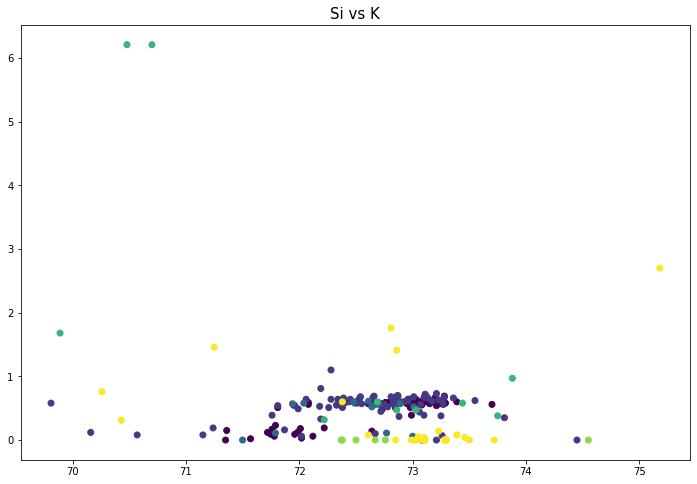

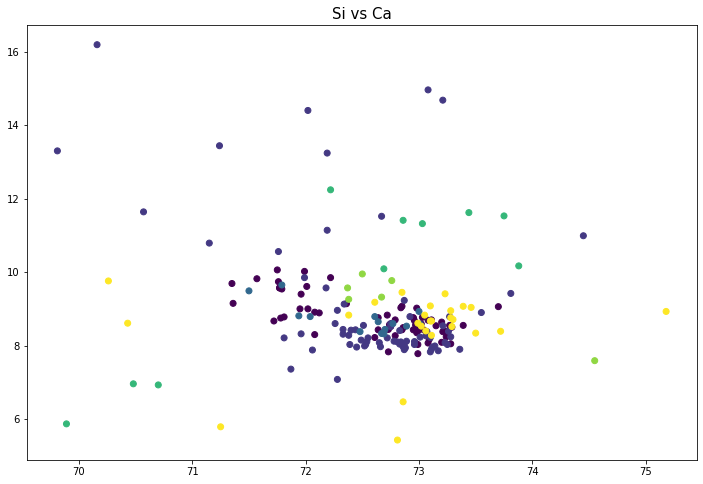

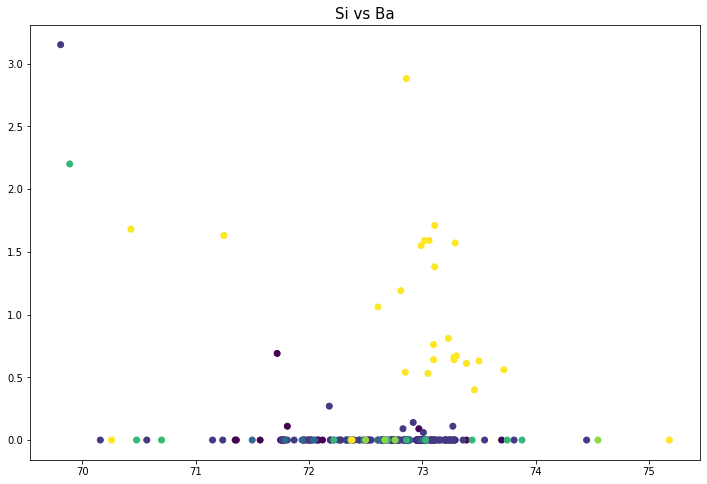

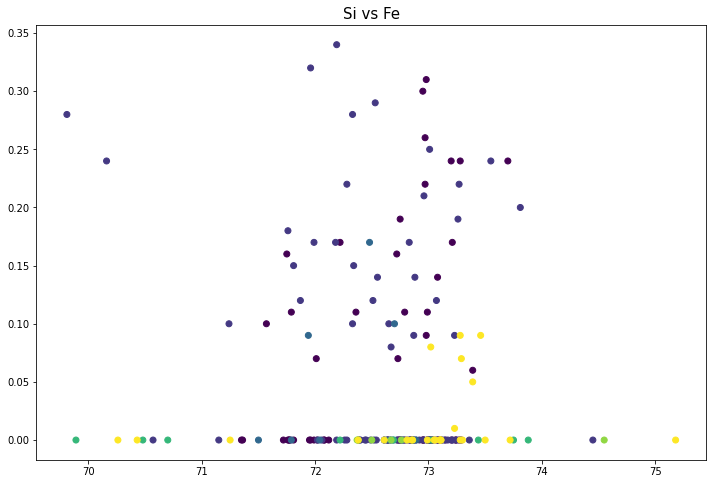

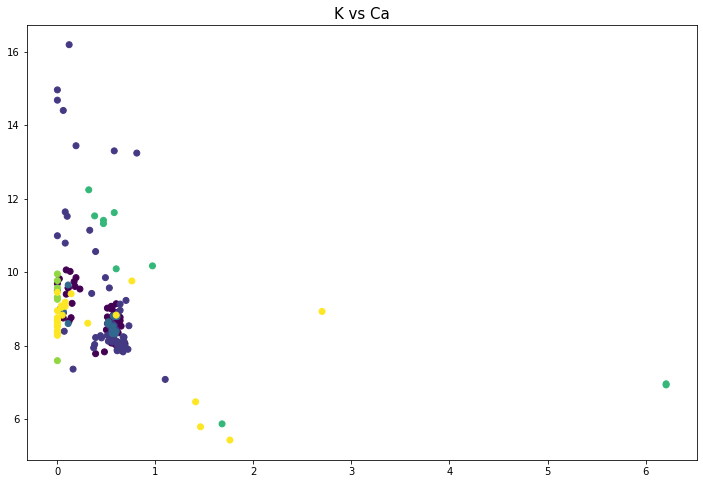

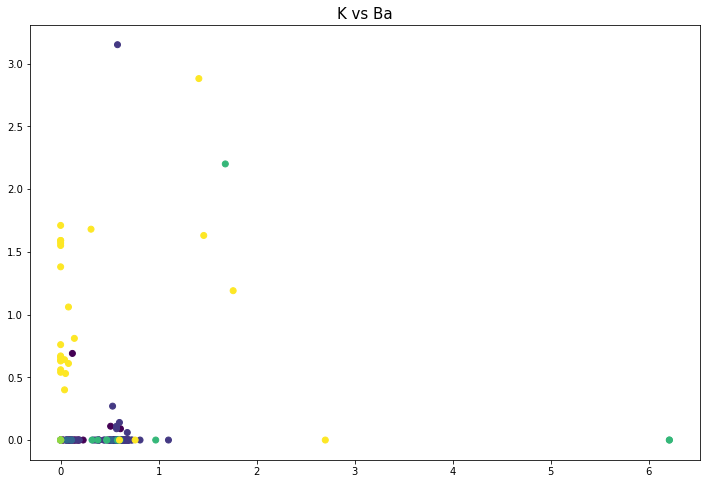

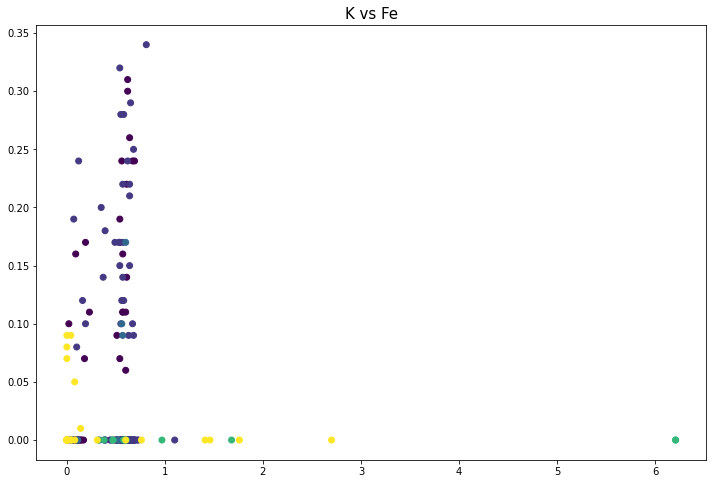

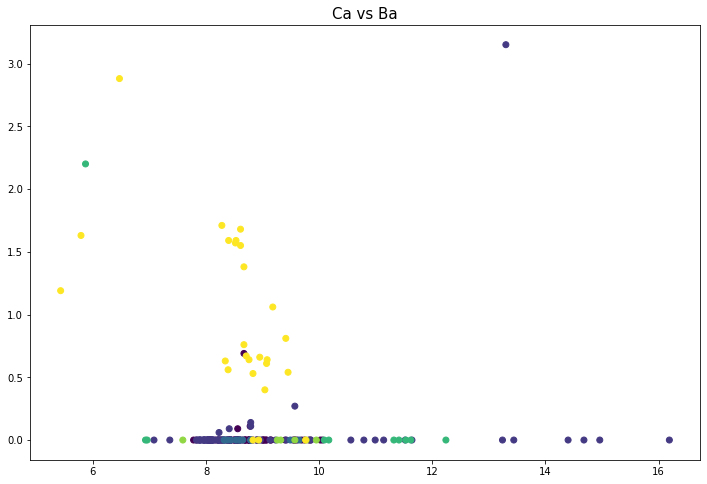

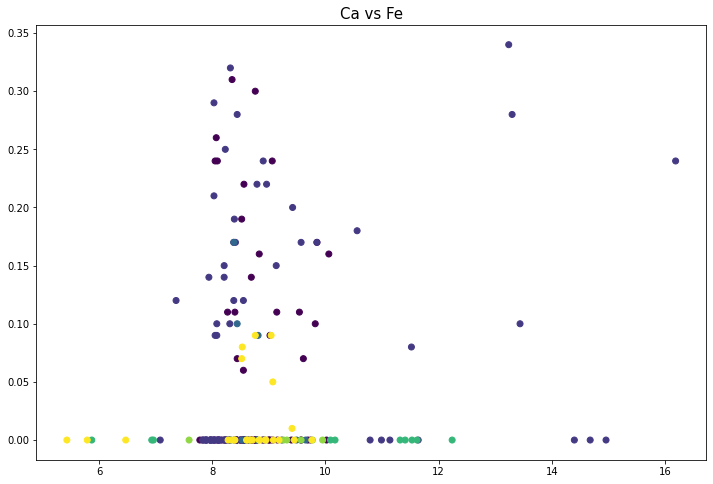

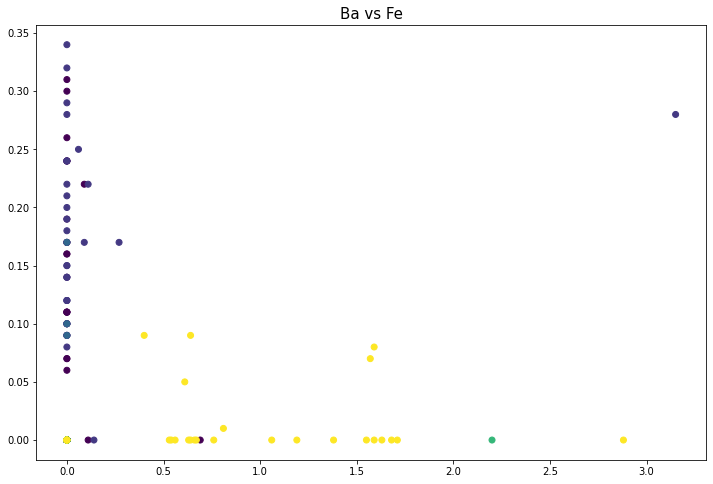

In [31]:
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        plt.figure(figsize = (12, 8))
        plt.scatter(df[cols[i]], df[cols[j]], c = df['glass'])
        plt.title(cols[i]+' vs '+cols[j], size = 15)
        plt.show()

In [32]:
df.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


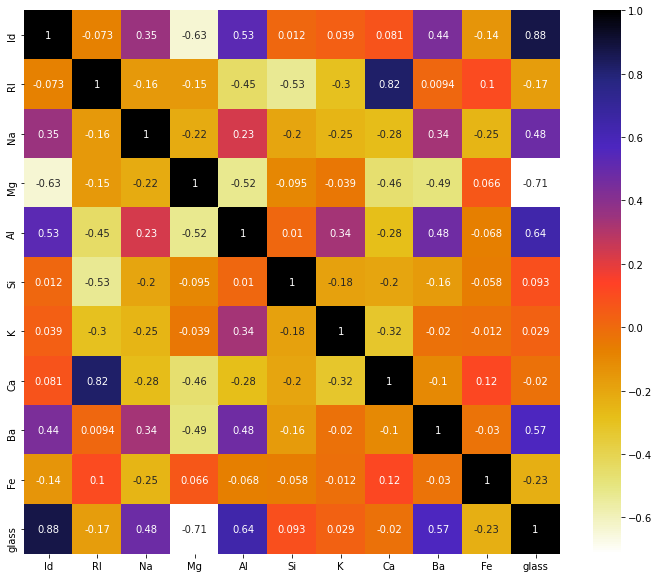

In [33]:
corr = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [34]:
df.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [35]:
df[df['glass'] == 1].tail(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
65,66,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.0,0.00,1
66,67,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.0,0.17,1


In [36]:
df[df['glass'] == 2].head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
67,71,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.0,0.12,2
68,72,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.0,0.32,2


We have same type of glass data in the order so Id highly correlated with class glass

In [37]:
df.drop(['Id'], axis = 1, inplace = True)

In [38]:
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


### Data Wrangling

In [39]:
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


<AxesSubplot:xlabel='Na'>

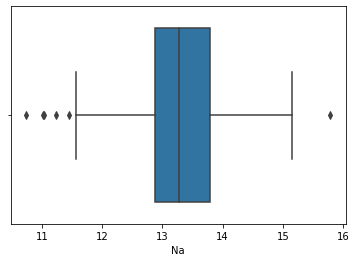

In [40]:
sns.boxplot(df['Na'])

In [41]:
na_mean = df[(df['Na'] > 11.5) & (df['Na'] < 15.5)]['Na'].mean()
na_mean

13.422578947368422

In [42]:
def out_na(col):
    if (col > 15.5) or (col < 11.5):
        return na_mean
    else:
        return col

In [43]:
df['Na'] = df['Na'].apply(out_na)

In [44]:
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


<AxesSubplot:xlabel='Al'>

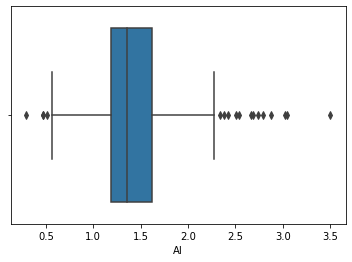

In [45]:
sns.boxplot(df['Al'])

In [46]:
al_mean = df[(df['Al'] < 2.3) & (df['Al'] > .55)]['Al'].mean()

In [47]:
def al_na(col):
    if col > 3:
        return al_mean
    else:
        return col

In [48]:
df['Al'] = df['Al'].apply(al_na)

In [49]:
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


<AxesSubplot:xlabel='Si'>

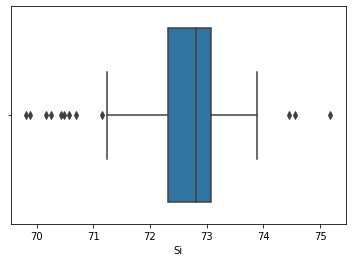

In [50]:
sns.boxplot(df['Si'])

In [51]:
si_mean = df[df['Si'] < 74]['Si'].mean()

In [52]:
def si_na(col):
    if col > 74:
        return si_mean
    else:
        return col

In [53]:
df['Si'] = df['Si'].apply(si_na)

In [54]:
k_mean = df[df['K'] < 2]['K'].mean()

In [55]:
def k_na(col):
    if col > 2:
        return k_mean
    else:
        return col

In [56]:
df['K'] = df['K'].apply(k_na)

In [57]:
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


<AxesSubplot:xlabel='Ca'>

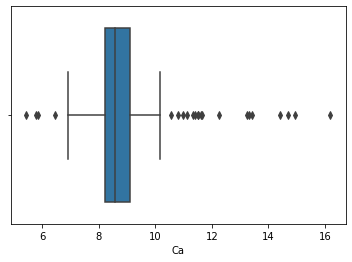

In [58]:
sns.boxplot(df['Ca'])

In [59]:
ca_mean = df[(df['Ca'] > 6.5) & (df['Ca'] < 12)]['Ca'].mean()

In [60]:
def ca_na(col):
    if col > 1.25:
        return ca_mean
    else:
        return col

In [61]:
df['Ca'] = df['Ca'].apply(ca_na)

In [62]:
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.752663,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,8.752663,0.0,0.0,1


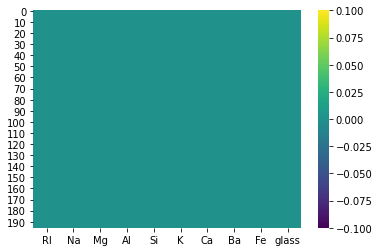

In [63]:
sns.heatmap(df.isnull(), cmap = 'viridis')
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      196 non-null    float64
 1   Na      196 non-null    float64
 2   Mg      196 non-null    float64
 3   Al      196 non-null    float64
 4   Si      196 non-null    float64
 5   K       196 non-null    float64
 6   Ca      196 non-null    float64
 7   Ba      196 non-null    float64
 8   Fe      196 non-null    float64
 9   glass   196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.4 KB


### Train Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train = df.drop(['glass'], axis = 1).copy()

In [68]:
y_train = df['glass'].copy()

In [69]:
test = pd.read_csv('testKNN.txt', names=col_names)
test.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1


In [70]:
test.drop(['Id'], axis = 1, inplace = True)

In [71]:
X_test = test.drop(['glass'], axis = 1).copy()
y_test = test['glass'].copy()

### Euclidean

In [72]:
from sklearn.metrics import classification_report

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
kn_euc = KNeighborsClassifier(p = 2, n_neighbors = 2)

In [75]:
kn_euc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [76]:
pred = kn_euc.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
euc_no_std = accuracy_score(y_test, pred)

In [79]:
euc_no_std

0.4444444444444444

In [80]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.20      0.33      0.25         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         3
           7       0.60      1.00      0.75         3

    accuracy                           0.44        18
   macro avg       0.37      0.44      0.35        18
weighted avg       0.37      0.44      0.35        18



Lets do Standardization

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc = StandardScaler()

In [83]:
X_train_sc = sc.fit_transform(X_train)

In [84]:
X_test_sc = sc.transform(X_test)

In [85]:
kn_euc.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=2)

In [86]:
pred = kn_euc.predict(X_test_sc)

In [87]:
euc_std = accuracy_score(pred, y_test)

In [88]:
euc_std

0.16666666666666666

In [89]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.17      1.00      0.29         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3

    accuracy                           0.17        18
   macro avg       0.03      0.17      0.05        18
weighted avg       0.03      0.17      0.05        18



for selected features

In [90]:
X_train_sel = df[['Al', 'RI', 'Mg']].copy()
X_test_sel = test[['Al', 'RI', 'Mg']].copy()

In [91]:
kn_euc.fit(X_train_sel, y_train)

KNeighborsClassifier(n_neighbors=2)

In [92]:
pred = kn_euc.predict(X_test_sel)

In [93]:
accuracy_score(y_test, pred)

0.5

In [94]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.17      0.33      0.22         3
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         3
           7       1.00      0.67      0.80         3

    accuracy                           0.50        18
   macro avg       0.43      0.50      0.44        18
weighted avg       0.43      0.50      0.44        18



In [95]:
acc = []
for i in range(1, 20):
    kn = KNeighborsClassifier(p = 2, n_neighbors = i)
    kn.fit(X_train_sel, y_train)
    pred = kn.predict(X_test_sel)
    accuracy = accuracy_score(y_test, pred)
    acc.append(accuracy)
    
df_ac = pd.DataFrame({'Neighbors':range(1, 20), 'Accuracy':acc})
df_ac = df_ac.sort_values(by = 'Accuracy', ascending = False)
df_ac

,Neighbors,Accuracy
0,1,0.555556
6,7,0.555556
10,11,0.555556
8,9,0.555556
7,8,0.555556
9,10,0.555556
5,6,0.555556
4,5,0.555556
3,4,0.500000
1,2,0.500000


In [96]:
euc_sel_neighbors = list(df_ac[df_ac['Accuracy'] == df_ac['Accuracy'].max()]['Neighbors'])
euc_sel = df_ac['Accuracy'].max()

---

### Manhattan

In [97]:
kn_man = KNeighborsClassifier(p = 1, n_neighbors = 2)

In [98]:
kn_man.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [99]:
pred = kn_man.predict(X_test)

In [100]:
man_no_std = accuracy_score(y_test, pred)

In [101]:
man_no_std

0.5

In [102]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.17      0.33      0.22         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.50        18
   macro avg       0.43      0.50      0.44        18
weighted avg       0.43      0.50      0.44        18



with standardization

In [103]:
kn_man.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [104]:
pred = kn_man.predict(X_test_sc)

In [105]:
man_std = accuracy_score(y_test, pred)

In [106]:
man_std

0.4444444444444444

In [107]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.14      0.33      0.20         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy                           0.44        18
   macro avg       0.43      0.44      0.38        18
weighted avg       0.43      0.44      0.38        18



In [108]:
acc = []
for i in range(1, 20):
    kn = KNeighborsClassifier(p = 1, n_neighbors = i)
    kn.fit(X_train_sel, y_train)
    pred = kn.predict(X_test_sel)
    accuracy = accuracy_score(y_test, pred)
    acc.append(accuracy)
    
df_ac = pd.DataFrame({'Neighbors':range(1, 20), 'Accuracy':acc})
df_ac = df_ac.sort_values(by = 'Accuracy', ascending = False)
df_ac

,Neighbors,Accuracy
9,10,0.555556
3,4,0.555556
4,5,0.555556
5,6,0.555556
6,7,0.555556
7,8,0.555556
8,9,0.555556
1,2,0.555556
10,11,0.555556
12,13,0.500000


In [109]:
man_sel_neighbors = list(df_ac[df_ac['Accuracy'] == df_ac['Accuracy'].max()]['Neighbors'])
man_sel = df_ac['Accuracy'].max()

In [110]:
idx = ['All features', 'No Standardization', 'Standardization', 'Selected features', 'Neighbors', 'With Selected features']
ls1 = ['', euc_no_std, euc_std, ['Al', 'RI', 'Mg'], euc_sel_neighbors, euc_sel]
ls2 = ['', man_no_std, man_std, ['Al', 'RI', 'Mg'], man_sel_neighbors, man_sel]

In [111]:
pd.DataFrame({'Euclidean':ls1, 'Manhattan':ls2}, index = idx)

,Euclidean,Manhattan
All features,,
No Standardization,0.444444,0.5
Standardization,0.166667,0.444444
Selected features,"[Al, RI, Mg]","[Al, RI, Mg]"
Neighbors,"[1, 7, 11, 9, 8, 10, 6, 5]","[10, 4, 5, 6, 7, 8, 9, 2, 11]"
With Selected features,0.555556,0.555556


---